<a href="https://colab.research.google.com/github/hariprasadyerra/project-CKD/blob/main/project_CKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! github.com/hariprasadyerra/project-CKD.git

/bin/bash: line 1: github.com/hariprasadyerra/project-CKD.git: No such file or directory


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#  Extracted chronic_kidney_disease_full.arff from ZIP
#  Parsed ARFF using scipy.io.arff
#  Converted to pandas DataFrame and saved as CSV



# Loding data set or importing data set

In [5]:
import pandas as pd

# Load the provided kidney disease dataset
file_path = "/content/drive/MyDrive/kidney_disease (1).csv"
df = pd.read_csv(file_path)

## dispalying fist few rows and last few rows

In [6]:
# Display the first few rows
print(df.head())

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]


In [7]:
# Dispaly the last few rows
print(df.tail())

      id   age    bp     sg   al   su     rbc      pc         pcc          ba  \
395  395  55.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   

     ...  pcv    wc   rc  htn  dm  cad appet  pe ane classification  
395  ...   47  6700  4.9   no  no   no  good  no  no         notckd  
396  ...   54  7800  6.2   no  no   no  good  no  no         notckd  
397  ...   49  6600  5.4   no  no   no  good  no  no         notckd  
398  ...   51  7200  5.9   no  no   no  good  no  no         notckd  
399  ...   53  6800  6.1   no  no   no  good  no  no         notckd  

[5 rows x 26 columns]


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [9]:
 #Check for missing values in the dataset
missing_values = df.isnull().sum()

missing_values


,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [10]:
print (df.describe(include='all'))

                id         age          bp          sg          al  \
count   400.000000  391.000000  388.000000  353.000000  354.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean    199.500000   51.483376   76.469072    1.017408    1.016949   
std     115.614301   17.169714   13.683637    0.005717    1.352679   
min       0.000000    2.000000   50.000000    1.005000    0.000000   
25%      99.750000   42.000000   70.000000    1.010000    0.000000   
50%     199.500000   55.000000   80.000000    1.020000    0.000000   
75%     299.250000   64.500000   80.000000    1.020000    2.000000   
max     399.000000   90.000000  180.000000    1.025000    5.000000   

                su     rbc      pc         pcc          ba  ...  pcv    wc  \
count   351.000000     248     335         396         396  ...  330   295   
uni

### Data cleaning

In [11]:
import pandas as pd
import numpy as np

# Make a copy of original dataset to avoid modifying raw data
df_clean = df.copy()

In [12]:
# Drop the 'id' column (not a useful feature)
df_clean.drop('id', axis=1, inplace=True)

In [13]:
# Replace "?" and empty strings with proper NaN
df_clean.replace("?", np.nan, inplace=True)

In [14]:
# Convert numeric columns stored as object to float
# These columns are known to be numeric but were stored as text
numeric_columns = ['pcv', 'wc', 'rc']
for col in numeric_columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

In [15]:
#Map binary/categorical values to numerical format
# Mapping yes/no, present/notpresent, good/poor, normal/abnormal to 1/0
binary_map = {
    'yes': 1, 'no': 0,
    'present': 1, 'notpresent': 0,
    'abnormal': 1, 'normal': 0,
    'poor': 1, 'good': 0
}

In [16]:

# Apply mapping to all binary object columns
binary_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in binary_columns:
    df_clean[col] = df_clean[col].map(binary_map)

In [17]:
# Clean the target column 'classification'
# Strip any whitespace
df_clean['classification'] = df_clean['classification'].astype(str).str.strip()

# Map class labels to 1 (CKD) and 0 (not CKD)
df_clean['classification'] = df_clean['classification'].map({'ckd': 1, 'notckd': 0})

# Convert to numeric, coercing errors to NaN, then fill NaN with 0 and convert to int
df_clean['classification'] = pd.to_numeric(df_clean['classification'], errors='coerce').fillna(0).astype(int)

In [18]:
# Check updated types and missing values
print("\n Cleaned Column Types:")
print(df_clean.dtypes)

print("\n  Missing Values After Cleaning:")
print(df_clean.isnull().sum())


 Cleaned Column Types:
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

  Missing Values After Cleaning:
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod           

In [19]:
# MISSING VALUE IMPUTATION

In [20]:
# Separate columns into numerical and binary (0/1)
# Numerical columns = continuous medical values (age, bp, bu, etc.)
# Binary columns = previously encoded (yes/no, present/notpresent)

numerical_cols = [
    'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
    'hemo', 'pcv', 'wc', 'rc'
]

binary_cols = [
    'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'
]

In [21]:
# Impute numerical columns using mean
for col in numerical_cols:
    mean_value = df_clean[col].mean()
    df_clean[col] = df_clean[col].fillna(mean_value)

# Impute binary columns using mode
for col in binary_cols:
    mode_value = df_clean[col].mode()[0]
    df_clean[col] = df_clean[col].fillna(mode_value)

# Final check for missing values
print("\n Missing Values After Imputation:")
print(df_clean.isnull().sum())



 Missing Values After Imputation:
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


## EDA  implementation



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for consistent, clean visuals
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set(font_scale=1.1)


## CKD vs non CKD count or distribution

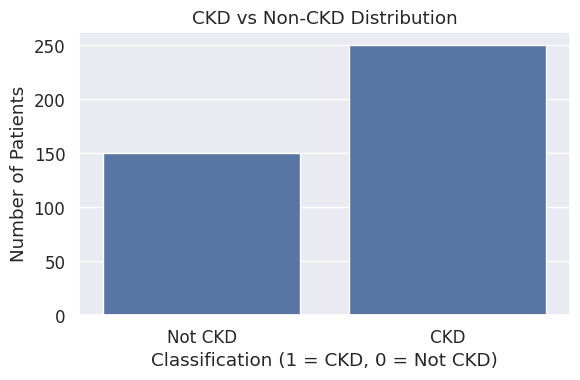

In [23]:

# making histogram
plt.figure(figsize=(6,4))
sns.countplot(x='classification', data=df_clean)
plt.title("CKD vs Non-CKD Distribution")
plt.xlabel("Classification (1 = CKD, 0 = Not CKD)")
plt.ylabel("Number of Patients")
plt.xticks([0, 1], ['Not CKD', 'CKD'])
plt.tight_layout()
plt.show()


## Age distribution

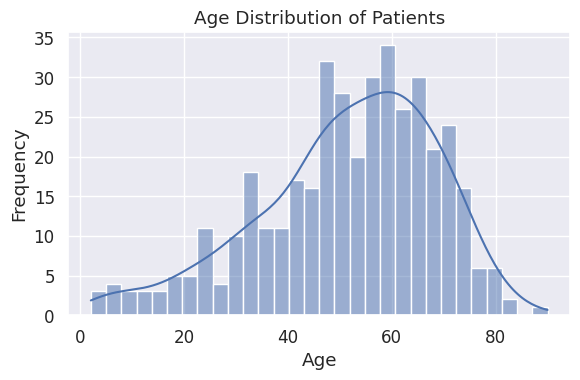

In [24]:
#implementing counter plot
plt.figure(figsize=(6,4))
sns.histplot(df_clean['age'], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## Creatinine (sc), Blood Pressure (bp), Hemoglobin (hemo)

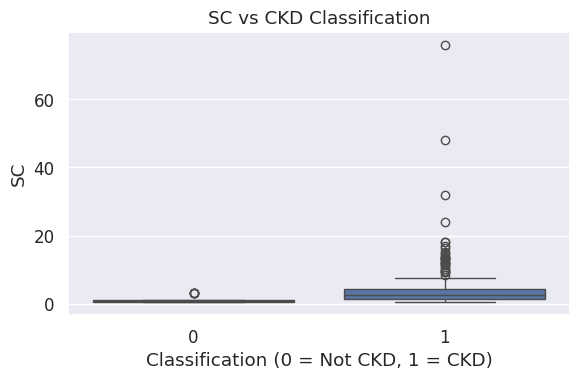

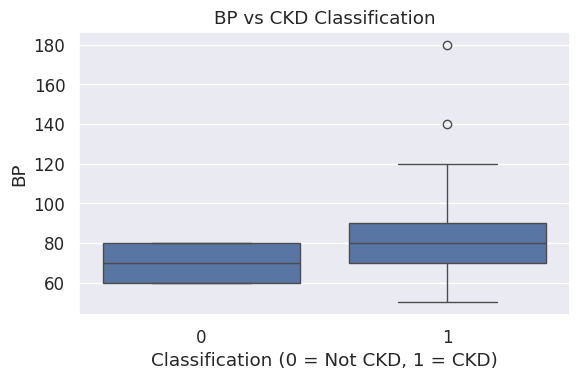

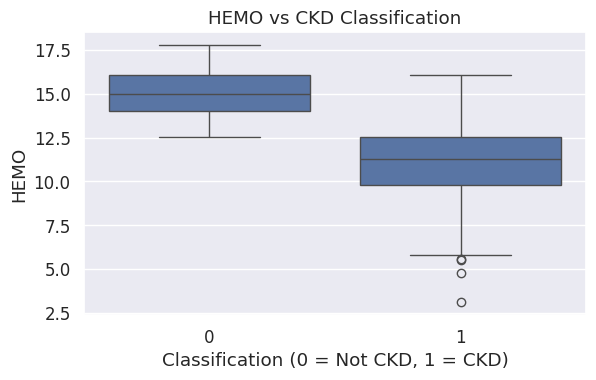

In [25]:
#creating boxplot or importing box plot
features = ['sc', 'bp', 'hemo']

for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='classification', y=col, data=df_clean)
    plt.title(f"{col.upper()} vs CKD Classification")
    plt.xlabel("Classification (0 = Not CKD, 1 = CKD)")
    plt.ylabel(col.upper())
    plt.tight_layout()
    plt.show()


## ##  Correlation Heatmap (using Numerical Features Only)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Data cleaning steps to restore df_clean

df_clean = df.drop(columns='id')  # Drop ID column
df_clean.replace("?", np.nan, inplace=True)  # Replace '?' with NaN

# Convert numeric object columns
numeric_columns = ['pcv', 'wc', 'rc']
for col in numeric_columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Map binary categorical values
binary_map = {
    'yes': 1, 'no': 0,
    'present': 1, 'notpresent': 0,
    'abnormal': 1, 'normal': 0,
    'poor': 1, 'good': 0
}
binary_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in binary_columns:
    df_clean[col] = df_clean[col].map(binary_map)




In [27]:

# Fix future warning with .map + astype(int)
df_clean['classification'] = df_clean['classification'].str.strip()
df_clean['classification'] = df_clean['classification'].map({'ckd': 1, 'notckd': 0}).astype(int)

# Impute missing values (numerical = mean, binary = mode)
numerical_cols = [
    'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
    'hemo', 'pcv', 'wc', 'rc'
]
for col in numerical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

for col in binary_columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

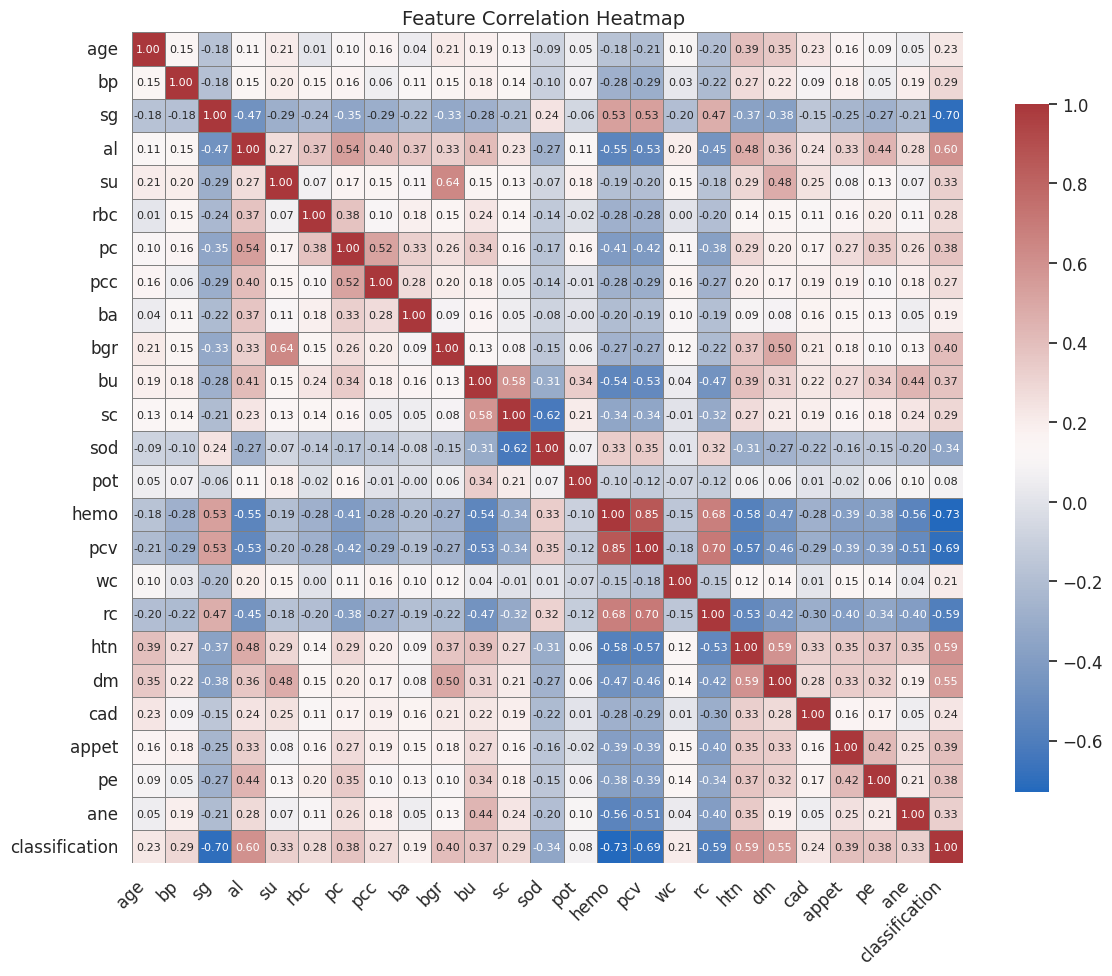

In [28]:
# Heatmap Feature Correlation
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)

plt.title("Feature Correlation Heatmap ", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


###  feature enginering